In [23]:
import pandas as pd
from configparser import ConfigParser
import psycopg2
import pandas.io.sql as sqlio
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Read in csv files
dce_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_dce.csv")
#fcev_df=pd.read_csv("..Data/NREL 2019 Survey Data/data/survey_res_fcev.csv")
main_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_main.csv")
person_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_person.csv")
pev_df=pd.read_csv("../Data/NREL 2019 Survey Data/data/survey_res_pev.csv")
vehicle_df=pd.read_csv("../Data//NREL 2019 Survey Data/data/survey_res_vehicle.csv")

In [3]:
col_drop=[
    'vehicletype_consideration_1',
    'vehicletype_consideration_2',
    'vehicletype_consideration_3',
    'vehicletype_consideration_4',
    'vehicletype_consideration_5',
    'vehicletype_consideration_6',
    'vehicletype_consideration_7',
    'vehicletype_consideration_8',
    'vehicletype_consideration_9',
    'vehicletype_consideration_10',
    'vehicletype_consideration_11',
    'vehicletype_consideration_12',
    'vehicletype_consideration_13',
    'fueltype_consideration_1_1',
    'fueltype_consideration_2_1',
    'fueltype_consideration_3_1',
    'fueltype_consideration_4_1',
    'fueltype_consideration_5_1',
    'fueltype_consideration_6_1',
    'fueltype_consideration_7_1',
    'fueltype_consideration_8_1',
    'fueltype_consideration_9_1',
    'fueltype_consideration_10_1',
    'fueltype_consideration_11_1',
    'fueltype_consideration_12_1',
    'fueltype_consideration_13_1',
    'fueltype_consideration_1_2',
    'fueltype_consideration_2_2',
    'fueltype_consideration_3_2',
    'fueltype_consideration_4_2',
    'fueltype_consideration_5_2',
    'fueltype_consideration_6_2',
    'fueltype_consideration_7_2',
    'fueltype_consideration_8_2',
    'fueltype_consideration_9_2',
    'fueltype_consideration_10_2',
    'fueltype_consideration_11_2',
    'fueltype_consideration_12_2',
    'fueltype_consideration_13_2',
    'fueltype_consideration_1_3',
    'fueltype_consideration_2_3',
    'fueltype_consideration_3_3',
    'fueltype_consideration_4_3',
    'fueltype_consideration_5_3',
    'fueltype_consideration_6_3',
    'fueltype_consideration_7_3',
    'fueltype_consideration_8_3',
    'fueltype_consideration_9_3',
    'fueltype_consideration_10_3',
    'fueltype_consideration_11_3',
    'fueltype_consideration_12_3',
    'fueltype_consideration_13_3',
    'fueltype_consideration_1_4',
    'fueltype_consideration_2_4',
    'fueltype_consideration_3_4',
    'fueltype_consideration_4_4',
    'fueltype_consideration_5_4',
    'fueltype_consideration_6_4',
    'fueltype_consideration_7_4',
    'fueltype_consideration_8_4',
    'fueltype_consideration_9_4',
    'fueltype_consideration_10_4',
    'fueltype_consideration_11_4',
    'fueltype_consideration_12_4',
    'fueltype_consideration_13_4',
    'fueltype_consideration_1_5',
    'fueltype_consideration_2_5',
    'fueltype_consideration_3_5',
    'fueltype_consideration_4_5',
    'fueltype_consideration_5_5',
    'fueltype_consideration_6_5',
    'fueltype_consideration_7_5',
    'fueltype_consideration_8_5',
    'fueltype_consideration_9_5',
    'fueltype_consideration_10_5',
    'fueltype_consideration_11_5',
    'fueltype_consideration_12_5',
    'fueltype_consideration_13_5',
    'fueltype_consideration_1_6',
    'fueltype_consideration_2_6',
    'fueltype_consideration_3_6',
    'fueltype_consideration_4_6',
    'fueltype_consideration_5_6',
    'fueltype_consideration_6_6',
    'fueltype_consideration_7_6',
    'fueltype_consideration_8_6',
    'fueltype_consideration_9_6',
    'fueltype_consideration_10_6',
    'fueltype_consideration_11_6',
    'fueltype_consideration_12_6',
    'fueltype_consideration_13_6',
    'fueltype_consideration_1_7',
    'fueltype_consideration_2_7',
    'fueltype_consideration_3_7',
    'fueltype_consideration_4_7',
    'fueltype_consideration_5_7',
    'fueltype_consideration_6_7',
    'fueltype_consideration_7_7',
    'fueltype_consideration_8_7',
    'fueltype_consideration_9_7',
    'fueltype_consideration_10_7',
    'fueltype_consideration_11_7',
    'fueltype_consideration_12_7',
    'fueltype_consideration_13_7',
    'fueltype_consideration_1_8',
    'fueltype_consideration_2_8',
    'fueltype_consideration_3_8',
    'fueltype_consideration_4_8',
    'fueltype_consideration_5_8',
    'fueltype_consideration_6_8',
    'fueltype_consideration_7_8',
    'fueltype_consideration_8_8',
    'fueltype_consideration_9_8',
    'fueltype_consideration_10_8',
    'fueltype_consideration_11_8',
    'fueltype_consideration_12_8',
    'fueltype_consideration_13_8',
    'consideration_1',
    'consideration_2',
    'consideration_3',
    'consideration_4',
    'consideration_5',
    'consideration_6',
    'consideration_7',
    'consideration_8',
    'consideration_9',
    'consideration_10',
    'consideration_11',
    'consideration_12',
    'consideration_13',
    'consideration_14',
    'consideration_15',
    'consideration_16',
    'consideration_17',
    'consideration_18',
    'consideration_19',
    'consideration_20',
    'consideration_21',
    'consideration_22',
    'consideration_23',
    'consideration_24',
    'consideration_25',
    'consideration_26',
    'consideration_27',
    'consideration_28',
    'consideration_29',
    'consideration_30',
    'consideration_31',
    'consideration_32',
    'consideration_33',
    'consideration_34',
    'consideration_35',
    'consideration_36',
    'consideration_37',
    'consideration_38',
    'consideration_39',
    'consideration_40',
    'consideration_41',
    'consideration_42',
    'consideration_43',
    'consideration_44',
    'consideration_45',
    'consideration_46',
    'consideration_47',
    'consideration_48',
    'consideration_49',
    'consideration_50',
    'consideration_51',
    'consideration_52',
    'consideration_53',
    'consideration_54',
    'consideration_55',
    'consideration_56',
    'consideration_57',
    'consideration_58',
    'consideration_59',
    'consideration_60',
    'consideration_61',
    'consideration_62',
    'consideration_63',
    'consideration_64',
    'consideration_65',
    'consideration_66',
    'consideration_67',
    'consideration_68',
    'consideration_69',
    'consideration_70',
    'consideration_71',
    'consideration_72',
    'consideration_73',
    'consideration_74',
    'consideration_75',
    'consideration_76',
    'consideration_77',
    'consideration_78',
    'consideration_79',
    'consideration_80',
    'consideration_81',
    'consideration_82',
    'consideration_83',
    'consideration_84',
    'consideration_85',
    'consideration_86',
    'consideration_87',
    'consideration_88',
    'consideration_89',
    'consideration_90',
    'consideration_91',
    'consideration_92',
    'consideration_93',
    'consideration_94',
    'consideration_95',
    'consideration_96',
    'consideration_97',
    'consideration_98',
    'consideration_99',
    'consideration_100',
    'consideration_101',
    'consideration_102',
    'consideration_103',
    'consideration_104']
main_df.drop(columns=col_drop, inplace=True)

In [4]:
#add ev_flag column
vehicle_df['ev_flag'] = 0

vehicle_df.loc[vehicle_df['fuel_clean'] == 3,'ev_flag'] = 1
vehicle_df.loc[vehicle_df['fuel_clean'] == 5,'ev_flag'] = 1
vehicle_df                                 

,sampno,vehno,vehicle_num,num_hh_vehicles,year,make,make_other,make_clean,model,model_other,...,business_miles,company_primary_driver,company_primary_driver_id,other_drivers,behavior_1,behavior_2,behavior_3,behavior_4,behavior_5,ev_flag
0,190001,1,1,1,1998,TOYOTA,,TOYOTA,REDACTED,REDACTED,...,,,,,,,,,,0
1,190003,1,1,2,2015,LEXUS,,LEXUS,NaN,NaN,...,,,,,,,,,,0
2,190005,2,2,2,2002,CHRYSLER,,CHRYSLER,NaN,NaN,...,,,,,,,,,,0
3,190006,1,1,2,2018,TOYOTA,,TOYOTA,NaN,NaN,...,,,,,,,,,,0
4,190009,3,3,3,2002,HONDA,,HONDA,NaN,NaN,...,,,,,,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,192322,2,2,2,2013,SUBARU,,SUBARU,NaN,NaN,...,,,,,,,,,,0
8045,192327,2,2,2,2018,TESLA,,TESLA,NaN,NaN,...,,,,,,,,,,1
8046,192334,4,4,4,2013,SCION,,SCION,NaN,NaN,...,,,,,,,,,,0
8047,192330,2,2,2,2015,FORD,,FORD,NaN,NaN,...,,,,,,,,,,0


In [18]:
#Count of total ev flagged vehicles
vehicle_df['ev_flag'].sum()

553

In [5]:
#Get respondents demographics
#person_df relationship 8 = self.
respondent_df = person_df.loc[person_df["relationship"]==8]
respondent_df

,sampno,perid,perno,relationship,gender,employment,student,education,license,vehno,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,190001,190001.p01,1,8,1,4,4,6,1,190001.v01,...,,2,0,0,0,0,1,0,0,
1,190003,190003.p01,1,8,2,4,4,8,1,190003.v01,...,,2,0,0,0,0,1,0,0,
2,190002,190002.p01,1,8,2,4,4,1,2,,...,,2,0,0,0,0,1,0,0,
3,190005,190005.p01,1,8,1,4,4,6,1,190005.v02,...,,2,0,0,0,0,1,0,0,
9,190004,190004.p01,1,8,2,4,1,4,2,,...,5,1,0,0,0,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8358,190792,190792.p01,1,8,1,1,4,6,1,190792.v02,...,,2,0,0,0,0,0,0,1,
8359,190795,190795.p01,1,8,2,1,4,8,1,190795.v01,...,,2,0,0,0,0,0,0,1,
8361,190845,190845.p01,1,8,2,2,4,5,1,190845.v01,...,,2,0,0,0,0,1,0,0,
8362,190803,190803.p01,1,8,2,1,4,8,1,190803.v01,...,,2,0,0,0,0,1,0,0,


In [6]:
#Merge respondents with Main table
respondent_merged_df = main_df.merge(respondent_df, how='left', on='sampno') 
respondent_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,192850,4,1,3,1,37,4,1,2,0,...,,2,0,0,0,0,1,0,0,
1,193449,4,1,3,1,34,6,3,3,0,...,,1,0,0,0,0,1,0,0,
2,193440,4,1,3,1,50,1,1,2,0,...,,2,0,0,0,0,1,0,0,
3,193133,4,1,4,1,33,2,1,1,0,...,,2,0,0,0,0,1,0,0,
4,193400,4,1,3,1,1,5,3,3,0,...,,2,0,1,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,190256,2,1,3,1,19,2,2,3,1,...,,1,0,0,0,0,1,0,0,
4244,191249,5,1,3,1,30,2,3,3,0,...,,2,0,1,0,0,0,0,0,
4245,190327,2,1,3,1,36,2,2,3,0,...,,2,0,0,0,0,1,0,0,
4246,191658,5,1,4,1,19,2,2,3,1,...,,2,0,0,0,0,1,0,0,


In [11]:
#Get list of all PEV owners
PEV_owners=pev_df.sampno 
PEV_owners.tolist()
len(PEV_owners)


451

In [19]:
#Create PEV owner column, populate from list
respondent_merged_df["PEV owner"] =0
for owner in PEV_owners:
    respondent_merged_df.loc[respondent_merged_df.sampno == owner,'PEV owner'] = 1

In [20]:
#Seperate df for PEV's and non PEVS
owner_merged_df =respondent_merged_df.loc[respondent_merged_df['PEV owner'] == 1]
owner_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner
40,192569,4,1,3,1,31,6,2,4,0,...,2,0,0,0,0,1,0,0,,1
41,192756,4,1,3,1,37,4,1,2,0,...,2,0,0,0,0,1,0,0,,1
105,192597,4,1,3,1,7,5,2,2,0,...,2,0,0,0,0,1,0,0,,1
129,192047,4,1,3,1,1,5,2,3,0,...,2,0,0,0,0,1,0,0,,1
132,192359,4,1,4,1,40,3,3,2,0,...,2,0,0,0,0,1,0,0,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,194031,5,1,2,1,19,2,1,3,0,...,2,0,0,0,0,1,0,0,,1
4241,190293,2,1,3,1,37,4,3,3,0,...,2,0,1,0,0,0,0,0,,1
4242,190650,5,1,3,1,27,3,1,3,0,...,2,0,0,0,0,1,0,0,,1
4243,190256,2,1,3,1,19,2,2,3,1,...,1,0,0,0,0,1,0,0,,1


In [21]:
nonowner_merged_df =respondent_merged_df.loc[respondent_merged_df['PEV owner'] == 0]
nonowner_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner
0,192850,4,1,3,1,37,4,1,2,0,...,2,0,0,0,0,1,0,0,,0
1,193449,4,1,3,1,34,6,3,3,0,...,1,0,0,0,0,1,0,0,,0
2,193440,4,1,3,1,50,1,1,2,0,...,2,0,0,0,0,1,0,0,,0
3,193133,4,1,4,1,33,2,1,1,0,...,2,0,0,0,0,1,0,0,,0
4,193400,4,1,3,1,1,5,3,3,0,...,2,0,1,0,0,0,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,191231,5,1,4,1,30,2,3,2,0,...,2,0,0,0,0,1,0,0,,0
4239,190906,5,1,3,1,1,5,3,6,0,...,2,0,0,0,0,1,0,0,,0
4244,191249,5,1,3,1,30,2,3,3,0,...,2,0,1,0,0,0,0,0,,0
4246,191658,5,1,4,1,19,2,2,3,1,...,2,0,0,0,0,1,0,0,,0


# Demographic Comparison between our EV and non-EV owning responders.

In [30]:
print(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
print(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())

race_1      9
race_2     90
race_3     10
race_4      4
race_5    305
race_6     13
race_7     39
dtype: int64
race_1      83
race_2     550
race_3     152
race_4      32
race_5    2673
race_6     163
race_7     276
dtype: int64


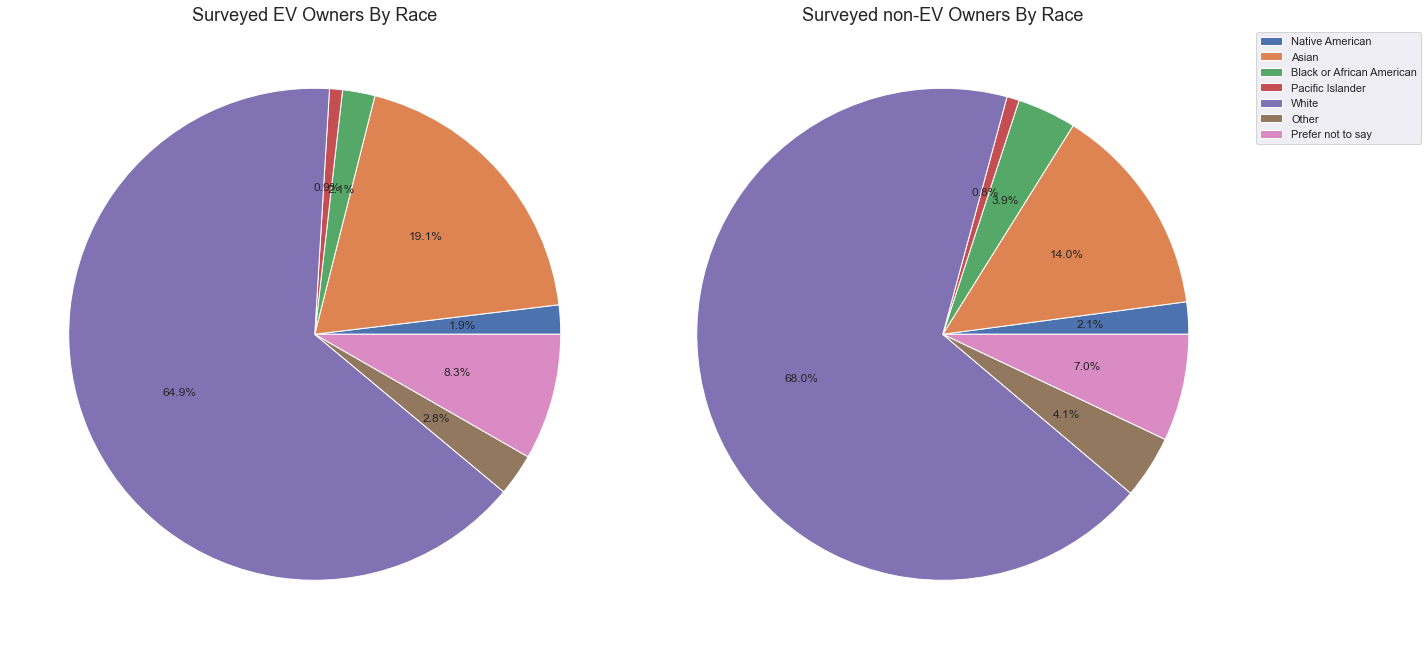

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies

labels = "Native American","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say"
values =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Race', fontsize=18)


values =(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax2.pie(values,autopct = '%1.1f%%') #plot second pie
#ax2.title('Surveyed non-EV Owners By Race')
ax2.legend(labels,bbox_to_anchor=(1, 1))
#plt.figtext(1,1,'Surveyed EV Owners v non-EV Owners By Race', fontsize=18, ha='center')
ax2.set_title('Surveyed non-EV Owners By Race', fontsize=18)
plt.tight_layout()

In [35]:
owner_race =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
owner_race.values
no_own_by_race=(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
print(owner_race.values,no_own_by_race.values)


[  9  90  10   4 305  13  39] [  83  550  152   32 2673  163  276]


In [39]:
#converting count into % totals labelled
race_df = pd.DataFrame({    
    'EV owners': [9,  90,  10,   4, 305,  13,  39],
    'Non-EV owners': [83,  550,  152,   32, 2673,  163,  276]
})
race_df=(100. * race_df / race_df.sum()).round(1)
Race =("American Indian or Alaska Native","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say")
  
race_df['Race']= Race  
race_df

,EV owners,Non-EV owners,Race
0,1.9,2.1,American Indian or Alaska Native
1,19.1,14.0,Asian
2,2.1,3.9,Black or African American
3,0.9,0.8,Pacific Islander
4,64.9,68.0,White
5,2.8,4.1,Other
6,8.3,7.0,Prefer not to say


In [29]:
print(owner_merged_df['ethnicity'].value_counts())
print(nonowner_merged_df['ethnicity'].value_counts())

2    394
1     35
3     22
Name: ethnicity, dtype: int64
2    3273
1     388
3     136
Name: ethnicity, dtype: int64


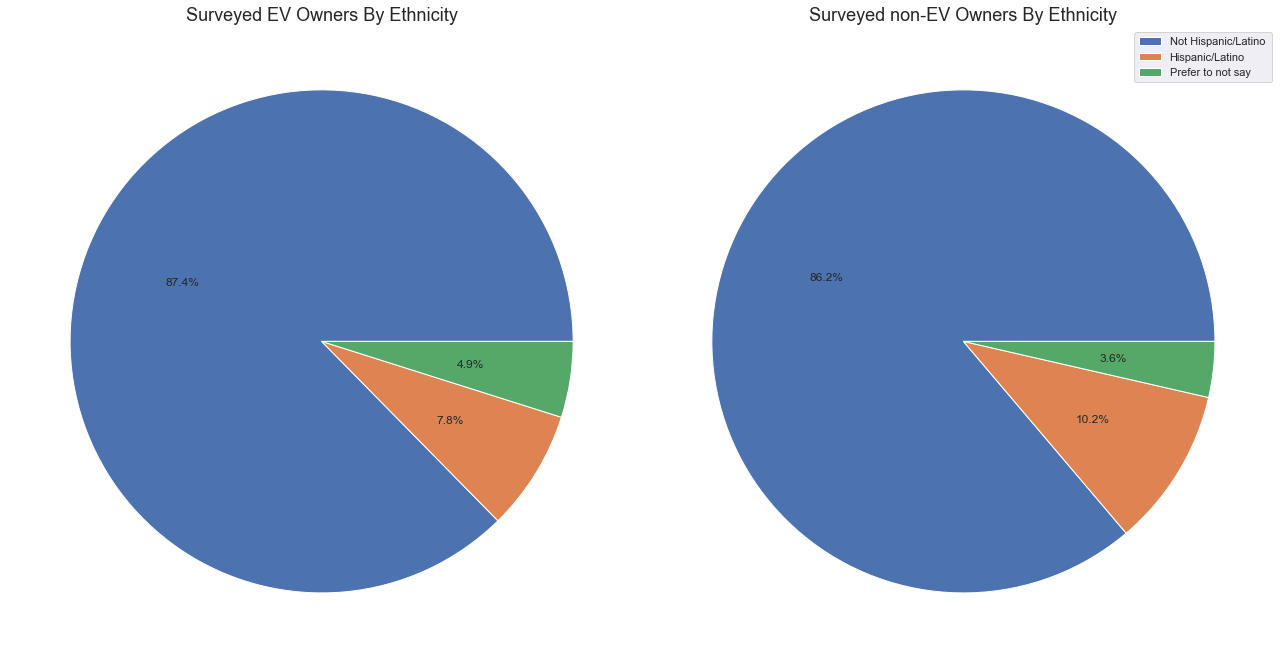

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
labels=  "Not Hispanic/Latino ","Hispanic/Latino","Prefer to not say"

values =(owner_merged_df['ethnicity'].value_counts())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Ethnicity', fontsize=18)

values =(nonowner_merged_df['ethnicity'].value_counts())
ax2.pie(values,autopct = '%1.1f%%') #plot first pie
ax2.set_title('Surveyed non-EV Owners By Ethnicity', fontsize=18)
ax2.legend(labels,bbox_to_anchor=(1, 1))
plt.tight_layout()

In [27]:
print(owner_merged_df['age_grp'].value_counts())
print(nonowner_merged_df['age_grp'].value_counts())

3    288
4    111
2     52
Name: age_grp, dtype: int64
3    1958
4    1363
2     476
Name: age_grp, dtype: int64


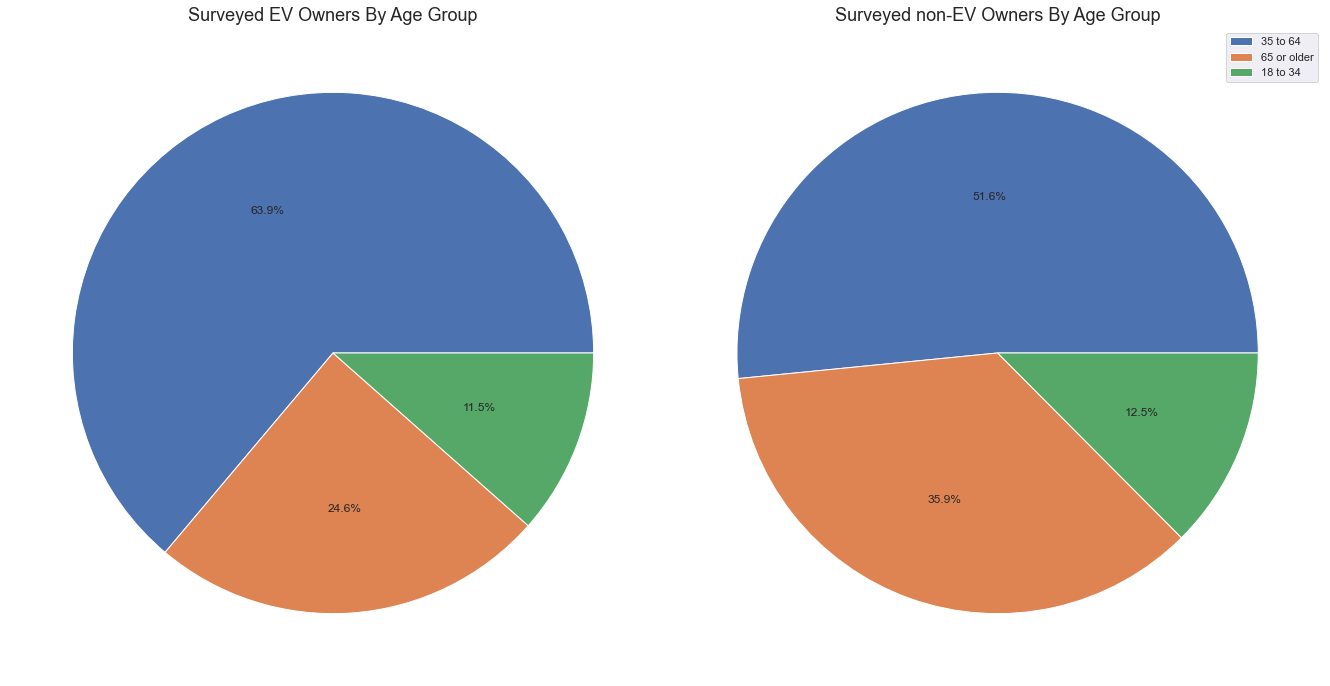

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
labels=  "35 to 64 ","65 or older","18 to 34"

values =(owner_merged_df['age_grp'].value_counts())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Age Group', fontsize=18)

values =(nonowner_merged_df['age_grp'].value_counts())
ax2.pie(values,autopct = '%1.1f%%') #plot first pie
ax2.set_title('Surveyed non-EV Owners By Age Group', fontsize=18)
ax2.legend(labels,bbox_to_anchor=(1, 1))
plt.tight_layout()

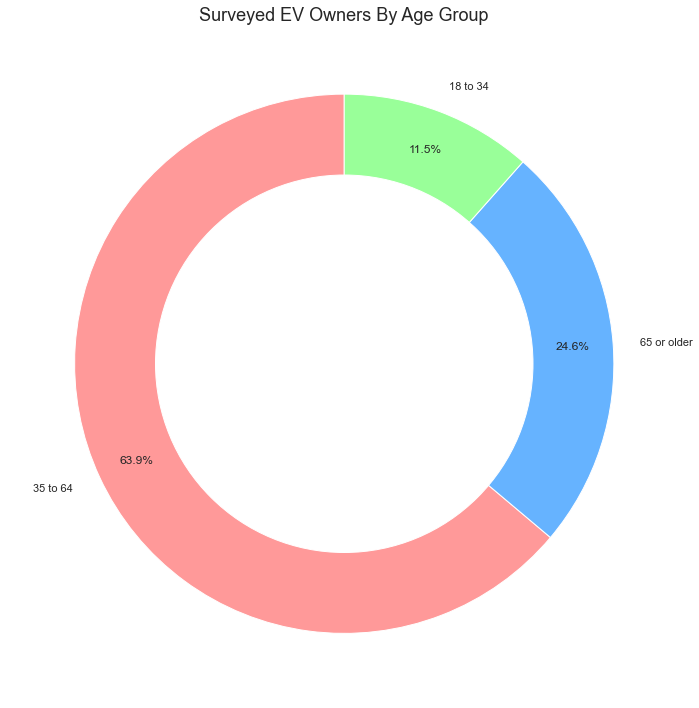

In [31]:
#Age displayed as donut!
# Pie chart
fig, ax = plt.subplots(1,figsize=(10,10)) #ax1,ax2 refer to your two pies
labels = ["35 to 64 ","65 or older","18 to 34"]
values =(owner_merged_df['age_grp'].value_counts())
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.0,0.0,0.00)
 
ax.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.set_title('Surveyed EV Owners By Age Group', fontsize=18)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

In [32]:
df1 = pd.DataFrame({'Age': ['18-34','35-64','65+'], 
                    'EV Owners': [11.5,63.9,24.6], 
                    'Non-EV Owners': [12.5,51.6,35.9]})
df1

,Age,EV Owners,Non-EV Owners
0,18-34,11.5,12.5
1,35-64,63.9,51.6
2,65+,24.6,35.9


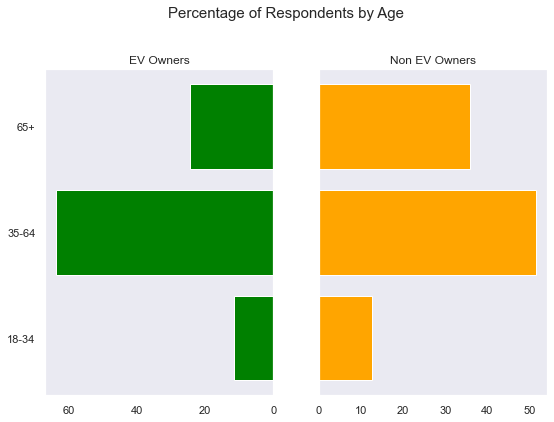

In [33]:
#Attempt at population pyramid
#define x and y limits
y = range(0, len(df1))
x_EV = df1['EV Owners']
x_nonEV = df1['Non-EV Owners']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:white')
plt.figtext(.5,1.0,"Percentage of Respondents by Age ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_EV, align='center', color='green')
axes[0].set(title='EV Owners')
axes[1].barh(y, x_nonEV, align='center', color='orange')
axes[1].set(title='Non EV Owners')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df1['Age'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

[Text(0.5, 0, 'Annual Income ($k)'), Text(0, 0.5, '')]

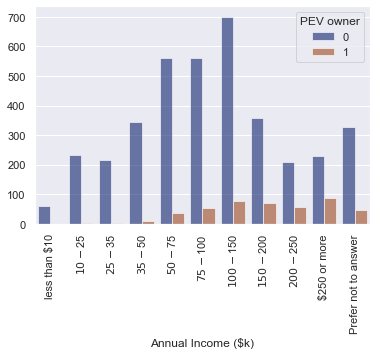

In [34]:
# Draw a nested barplot income /owner
g = sns.countplot(
    data=respondent_merged_df, 
    x="income", hue= "PEV owner",
    palette="dark", alpha=.6,
)
g.set_xticklabels(["less than $10",
"$10 - $25",
"$25 - $35",
"$35 - $50",
"$50 - $75",
"$75 - $100",
"$100 - $150",
"$150 - $200",
"$200 - $250",
"$250 or more",
"Prefer not to answer"],rotation=90)

#g.despine(left=True)
g.set(xlabel="Annual Income ($k)", ylabel = "")
#g.set_axis_labels("Annual Income($k)", " ")
#g.legend.set_title("")

In [40]:
#Drop "prefer not to say"
df_income_declared = respondent_merged_df[respondent_merged_df['income'] != 11]

In [42]:
df_income_declared.income.value_counts()

7     779
6     615
5     598
8     430
4     354
10    317
9     265
2     235
3     221
1      59
Name: income, dtype: int64

# Categorical distribution plots

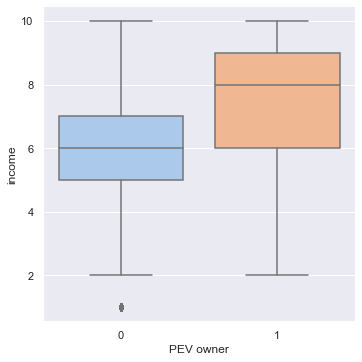

In [43]:
#Income /PEV non-PEV
g= sns.catplot(x="PEV owner", y="income", kind="box",palette="pastel", data=df_income_declared)

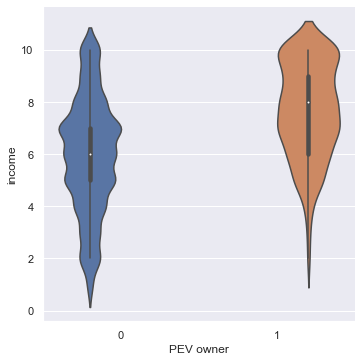

In [44]:
sns.catplot(x="PEV owner", y="income", hue="PEV owner",
            kind="violin", data=df_income_declared)

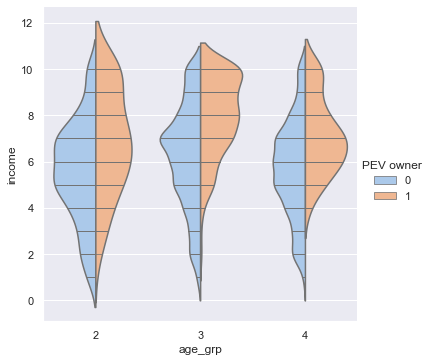

In [45]:
sns.catplot(x="age_grp", y="income", hue="PEV owner",
            kind="violin",inner="stick",split=True,palette="pastel", data=df_income_declared)

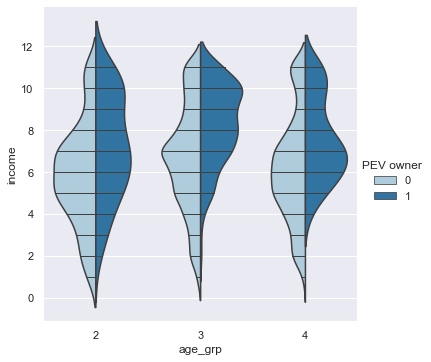

In [46]:
sns.set_palette("Paired")
sns.catplot(x="age_grp", y="income", hue="PEV owner",
            kind="violin",inner="stick",split=True,
           
            data=respondent_merged_df)

[Text(0, 0, 'Less than high school'),
 Text(1, 0, 'High school graduate'),
 Text(2, 0, 'Tech school'),
 Text(3, 0, 'Some college'),
 Text(4, 0, 'Associate degree)'),
 Text(5, 0, 'College graduate'),
 Text(6, 0, 'Post-graduate work'),
 Text(7, 0, 'Post-graduate degree')]

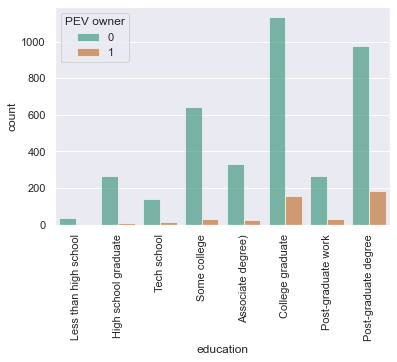

In [47]:
g=sns.countplot(
    data=respondent_merged_df, 
    x="education", hue= "PEV owner",
    palette="Dark2", alpha=0.6,
)
g.set_xticklabels(["Less than high school",
                   "High school graduate","Tech school",
"Some college","Associate degree)",
"College graduate",
"Post-graduate work",
"Post-graduate degree"],rotation=90)


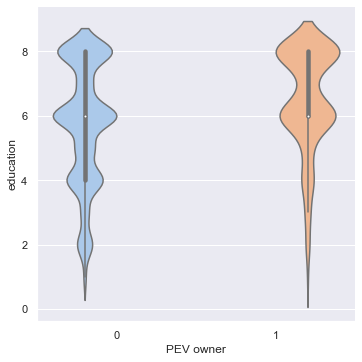

In [52]:
sns.catplot(x="PEV owner", y="education", hue="PEV owner",
            kind="violin",palette="pastel", data=respondent_merged_df)

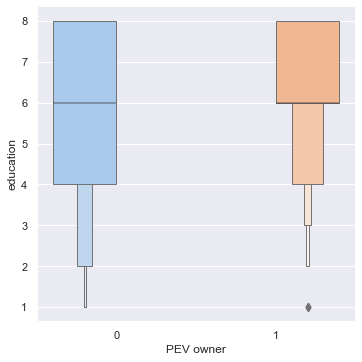

In [53]:
sns.catplot(x="PEV owner", y="education", hue="PEV owner",
            kind="boxen",palette="pastel", data=respondent_merged_df)

In [48]:
respondent_merged_df.loc[respondent_merged_df.education==8].count()

sampno        1160
source        1160
language      1160
age_grp       1160
california    1160
              ... 
race_5        1160
race_6        1160
race_7        1160
race_6_x      1160
PEV owner     1160
Length: 112, dtype: int64

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, '')]

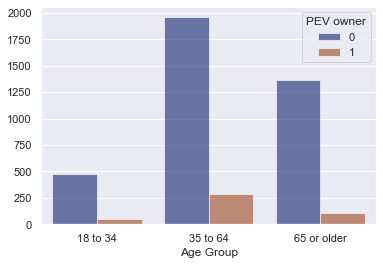

In [49]:
g=sns.countplot(
    data=respondent_merged_df, 
    x="age_grp", hue= "PEV owner",
    palette="dark", alpha=.6,
)
g.set_xticklabels(["18 to 34", "35 to 64", "65 or older"])
g.set(xlabel="Age Group", ylabel = "")